#  Iris Data Set 
http://archive.ics.uci.edu/ml/datasets/Iris

### Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].replace('Iris-setosa', 0).replace('Iris-versicolor', 1).replace('Iris-virginica', 2)

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
nn=MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=(10,2), 
                 max_iter=100, learning_rate_init=0.2, learning_rate='adaptive')
nn.fit(X_train,y_train)

pred = nn.predict(X_test)


list(pred == y_test.values).count(True) / len(pred) * 100

100.0

In [6]:
pred

array([1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 1, 0, 1, 0])

In [7]:
y_test.values

array([1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 1, 0, 1, 0])

In [8]:
import matplotlib.pyplot as plt

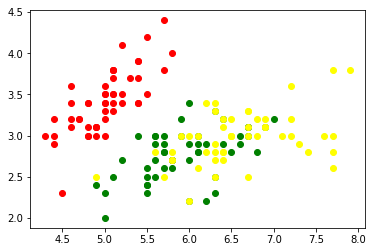

In [15]:
plt.plot(df[0].values[0:50], df[1].values[0:50], 'o', color='red')
plt.plot(df[0].values[50:100], df[1].values[50:100], 'o', color='green')
plt.plot(df[0].values[100:150], df[1].values[100:150], 'o', color='yellow')
plt.show()

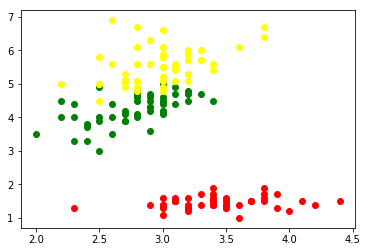

In [16]:
plt.plot(df[1].values[0:50], df[2].values[0:50], 'o', color='red')
plt.plot(df[1].values[50:100], df[2].values[50:100], 'o', color='green')
plt.plot(df[1].values[100:150], df[2].values[100:150],'o', color='yellow')
plt.show()

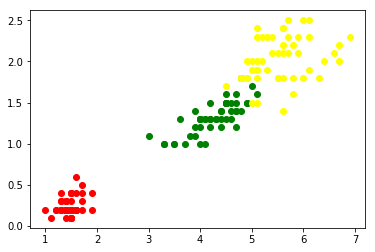

In [17]:
plt.plot(df[2].values[0:50], df[3].values[0:50], 'o', color='red')
plt.plot(df[2].values[50:100], df[3].values[50:100], 'o', color='green')
plt.plot(df[2].values[100:150], df[3].values[100:150], 'o', color='yellow')
plt.show()